In [1]:
import numpy as np
import matplotlib as ml
import matplotlib.pyplot as pp

# Задание 1

Треугольное озеро с островом

In [108]:
def boundary(grid):
    x = np.linspace(0,1,len(grid))
    B = np.array([[1 if (j // 2) < (i) else 0 for j in range(len(grid))] for i in range(len(grid))])
    C = np.array([[0 if (abs(i - len(grid) / 2) < len(grid) / 10) and (len(grid) / 10 < j < len(grid) / 5) else 1 for j in range(len(grid))] for i in range(len(grid))])
    
    grid[0,:]  = np.interp(x,[0,1],[0,0])
    grid[:,-1] = np.interp(x,[0,1],[0,0])
    grid[-1,:] = np.interp(x,[0,1],[0,0])
    grid[:,0]  = np.interp(x,[0,0.5,1],[0.1,1,0.1])
    grid *= B
    grid *= np.flip(B, axis=0)
    grid *= C

In [92]:
def showsol(sol):
    pp.imshow(sol.T,cmap=ml.cm.Blues,interpolation='none',origin='lower')

In [93]:
def jacobi(grid):
    newgrid = np.zeros(shape=grid.shape,dtype=grid.dtype)

    # apply evolution operator
    newgrid[1:-1,1:-1] = 0.25 * (grid[1:-1,:-2] + grid[1:-1,2:] +
                                 grid[:-2,1:-1] + grid[2:,1:-1])

    # copy boundary conditions
    boundary(newgrid)
    
    return newgrid

In [94]:
def initgrid(gridsize):
    x = np.random.randn(gridsize,gridsize)
    boundary(x)
    
    return x

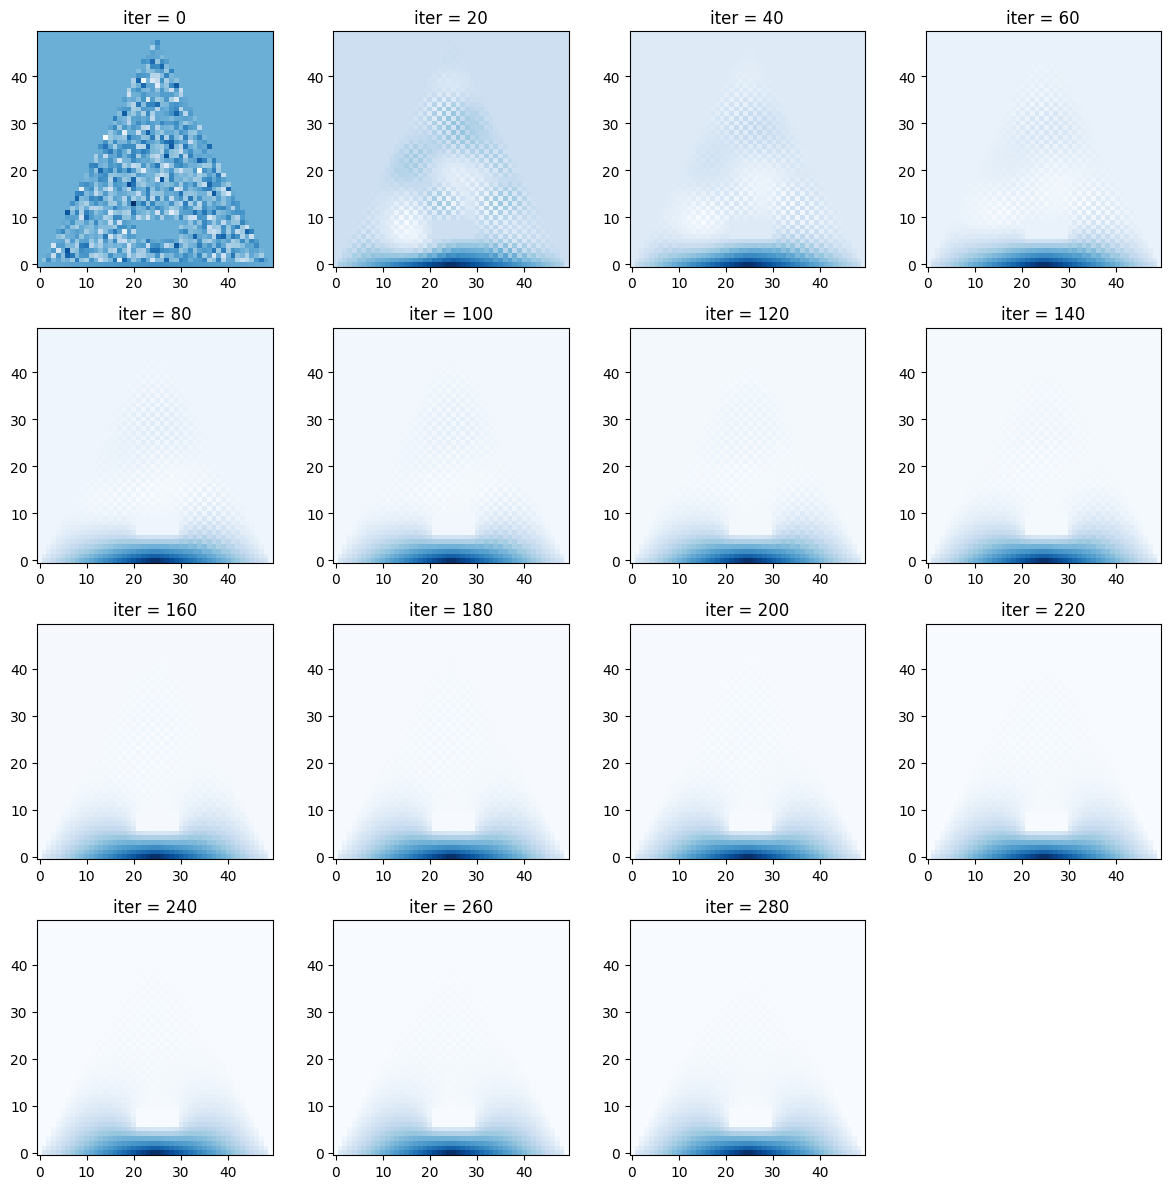

In [109]:
x = initgrid(50)
# boundary(x)

pp.figure(figsize=(12,12))

for i in range(300):    
    if i % 20 == 0:
        pp.subplot(4,4,i//20+1)
        showsol(x)
        pp.title('iter = %s' % i)
        
    x = jacobi(x)

pp.tight_layout()